<a href="https://colab.research.google.com/github/sgyatri/SIH/blob/main/plswork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab cell 1
!pip install mediapipe tensorflow tensorflowjs opencv-python-headless tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of ydf to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of ydf to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 90.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer tha

In [ ]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 99% 1.02G/1.03G [00:11<00:00, 66.1MB/s]
100% 1.03G/1.03G [00:11<00:00, 98.0MB/s]


In [ ]:
!unzip -q asl-alphabet.zip -d /content/dataset


In [ ]:
import os
print(os.listdir('/content/dataset'))


['asl_alphabet_train', 'asl_alphabet_test']


In [ ]:
import os

train_path = '/content/dataset/asl_alphabet_train/asl_alphabet_train'
classes = os.listdir(train_path)
print(classes)
print("Number of classes:", len(classes))


['J', 'I', 'Z', 'P', 'W', 'M', 'R', 'A', 'X', 'C', 'F', 'D', 'O', 'del', 'B', 'V', 'H', 'Q', 'space', 'U', 'T', 'Y', 'E', 'L', 'N', 'G', 'nothing', 'K', 'S']
Number of classes: 29


In [ ]:
train_path = '/content/dataset/asl_alphabet_train/asl_alphabet_train'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # you can increase later
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 610s 281ms/step - accuracy: 0.6292 - loss: 1.1152 - val_accuracy: 0.6894 - val_loss: 1.0329
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 620s 280ms/step - accuracy: 0.8361 - loss: 0.4733 - val_accuracy: 0.7648 - val_loss: 0.7729
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 613s 282ms/step - accuracy: 0.8906 - loss: 0.3130 - val_accuracy: 0.7908 - val_loss: 0.7623
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 617s 279ms/step - accuracy: 0.9183 - loss: 0.2445 - val_accuracy: 0.7874 - val_loss: 0.8632
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 622s 286ms/step - accuracy: 0.9355 - loss: 0.1887 - val_accuracy: 0.8216 - val_loss: 0.7092
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 603s 277ms/step - accuracy: 0.9468 - loss: 0.1558 - val_accuracy: 0.8241 - val_loss: 0.7005
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 682s 305ms/step - accuracy: 0.9524 - loss: 0.1434 - val_accuracy: 0.8383 - val_loss: 0.6467
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 621s 277ms/step - ac

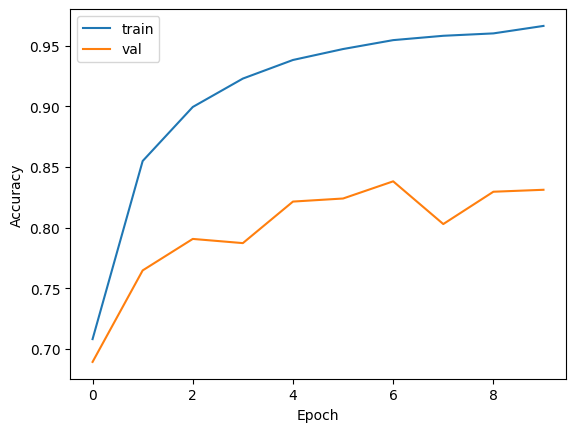

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('asl_alphabet_cnn.h5')


In [ ]:
# Native Keras format
model.save('asl_alphabet_cnn.keras')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('asl_alphabet_cnn.keras')


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saving A_test.jpg to A_test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted ASL letter: A


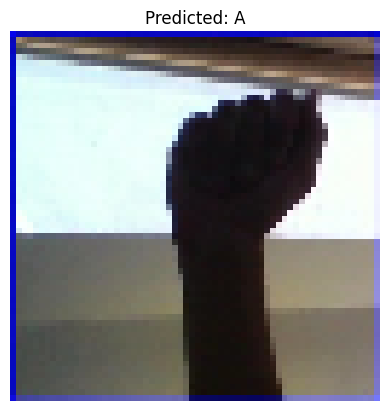

In [ ]:
# 1️⃣ Import libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# 2️⃣ Load your saved ASL model
model = load_model('asl_alphabet_cnn.keras')

# 3️⃣ Upload an image
uploaded = files.upload()  # will open a file dialog
img_path = list(uploaded.keys())[0]

# 4️⃣ Preprocess the image
img = image.load_img(img_path, target_size=(64,64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # shape (1,64,64,3)

# 5️⃣ Predict class
pred = model.predict(img_array)
class_index = np.argmax(pred)

# 6️⃣ Map class index to ASL letter
# Make sure train_generator.class_indices exists from training step
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[class_index]

# 7️⃣ Show results
print("Predicted ASL letter:", predicted_class)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
# Save in native Keras format
model.save('asl_alphabet_cnn.keras')


In [ ]:
from google.colab import files
files.download('asl_alphabet_cnn.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>